# **Housing Data Final Cleanup & Exploratory Data Analysis**

### **Importing Required Libraries**

Importing core libraries including `pandas`, `numpy`, `matplotlib`, and `seaborn` for data manipulation and visualization throughout eda and cleaning.


In [1842]:
# importing needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1843]:
df = pd.read_csv("cleaned_housing_data.csv")
df

,id,address,city,beds,baths,price,status,square_feet,acres,year_built,days_on_market,property_type,hoa_per_month,url
0,1,Tbd Lake Lndg,Abingdon,0.0,0.0,299000,Active,0,1.58,0,46,Land,29,https://www.redfin.com/VA/Unknown/Tbd-Lake-Lnd...
1,2,000 James St,Bluefield,0.0,0.0,31500,Active,0,1.36,0,41,Land,0,https://www.redfin.com/VA/Bluefield/James-St-2...
2,3,Tbd Bridgeview Dr,Abingdon,0.0,0.0,70000,Active,0,0.50,0,354,Land,0,https://www.redfin.com/VA/Unknown/Tbd-Bridgevi...
3,4,0 Tyler St,Abbs Valley,0.0,0.0,25000,Active,0,0.00,0,41,Land,0,https://www.redfin.com/VA/Abbs-Valley/Tyler-St...
4,5,19510 Wynscape Dr,Abingdon,3.0,2.5,470000,Active,2216,0.45,2006,7,Single Family,0,https://www.redfin.com/VA/Abingdon/19510-Wynsc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24244,24245,146 Broomsedge Ln,Winchester,3.0,2.5,689000,Active,1800,5.20,2025,111,Single Family,0,https://www.redfin.com/VA/Winchester/146-Broom...
24245,24246,482 Diamondback Ln,Winchester,3.0,2.0,395000,Active,880,10.38,2019,111,Single Family,0,https://www.redfin.com/VA/Winchester/482-Diamo...
24246,24247,520 Highland Ave,Winchester,0.0,0.0,120000,Active,0,0.12,0,120,Land,0,https://www.redfin.com/VA/Winchester/520-Highl...
24247,24248,Wardensville Grade Lot 4,Winchester,0.0,0.0,1500000,Active,0,140.54,0,124,Land,0,https://www.redfin.com/VA/Winchester/Wardensvi...


### **Data structure/overview**

In [1844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24249 entries, 0 to 24248
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              24249 non-null  int64  
 1   address         24248 non-null  object 
 2   city            24245 non-null  object 
 3   beds            24249 non-null  float64
 4   baths           24249 non-null  float64
 5   price           24249 non-null  int64  
 6   status          24249 non-null  object 
 7   square_feet     24249 non-null  int64  
 8   acres           24249 non-null  float64
 9   year_built      24249 non-null  int64  
 10  days_on_market  24249 non-null  int64  
 11  property_type   24249 non-null  object 
 12  hoa_per_month   24249 non-null  int64  
 13  url             24249 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.6+ MB


In [1845]:
df.describe()

,id,beds,baths,price,square_feet,acres,year_built,days_on_market,hoa_per_month
count,24249.000000,24249.000000,24249.000000,2.424900e+04,24249.000000,24249.000000,24249.000000,24249.000000,24249.000000
mean,12125.000000,2.761557,2.153041,6.622089e+05,1972.790094,6.274300,1372.963256,121.102767,81.679657
std,7000.227675,1.874499,1.654739,1.129283e+06,5823.642288,138.203239,917.879794,213.446262,327.117916
min,1.000000,0.000000,0.000000,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6063.000000,2.000000,1.000000,2.400000e+05,767.000000,0.000000,0.000000,18.000000,0.000000
50%,12125.000000,3.000000,2.000000,4.250000e+05,1689.000000,0.250000,1968.000000,46.000000,0.000000
75%,18187.000000,4.000000,3.000000,7.150000e+05,2634.000000,1.000000,2005.000000,124.000000,71.000000
max,24249.000000,44.000000,40.000000,6.000000e+07,861617.000000,20001.000000,2026.000000,4134.000000,40758.000000


### **Dropping Irrelevant Columns**

I had originally added the `id` column in MySQL but determined it was unessisary for what I was trying to accomplish, so I removed it.


In [1846]:
# dont actually need the id column so I am dropping it here
df = df.drop(columns='id')

### **Inspecting Zero Values**

I checked for zero values in key numeric columns to identify possible placeholder values that may indicate missing data. As SQL null values tend to convert to 0's when  transferring over to a python dataframe.


In [1847]:
# checking if zero vazlues were just converted from null in csv conversion``
print((df[['beds', 'baths', 'square_feet', 'acres','year_built']] == 0).sum())

beds           5464
baths          5454
square_feet    5456
acres          6378
year_built     7484
dtype: int64


### **Converting Zeroes to NaN**

Zero values in columns like `square_feet` or `price` are supposed to be null. We convert them to `NaN` for accurate treatment during cleaning and analysis.


In [1848]:
# convert those 0 values (which technically are nulls) back to null values and then check 
cols_to_convert = ['beds', 'baths', 'square_feet', 'acres','year_built']
df[cols_to_convert] = df[cols_to_convert].replace(0, np.nan)
print(df[cols_to_convert].isnull().sum())


beds           5464
baths          5454
square_feet    5456
acres          6378
year_built     7484
dtype: int64


# **Outlier Detection and Treatment**

### **Initial Correlation Matrix**

I wanted to get an idea of how the numeric columns were associated before I did any distribution checks/outlier removal.


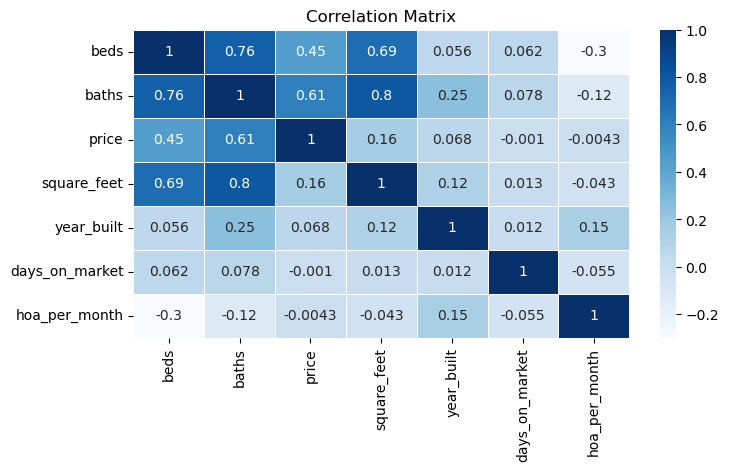

In [1849]:
# correlation matrix for basic understanding of which values have most similarity - also for comparison later after distribution changes
cols = ['beds', 'baths', 'price', 'square_feet', 'year_built', 'days_on_market', 'hoa_per_month']

corr = df[cols].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, linewidths=0.5,cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

### **Viewing Top Outliers for Each Numeric Column/Plotting Distribution**

I sorted and display the top 5 extreme values for each key numeric column to understand the scale of outliers before removal. I also added distribution charts to better visualize key places to look for outliers.


top outliers: beds


11995    44.0
5025     40.0
5005     24.0
24084    19.0
13813    15.0
Name: beds, dtype: float64

Starting distributions for beds before outliers removed:


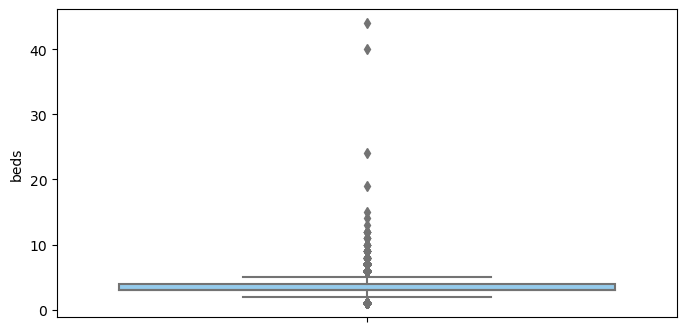

top outliers: baths


5025     40.0
11995    29.0
6272     25.0
13813    15.0
12996    15.0
Name: baths, dtype: float64

Starting distributions for baths before outliers removed:


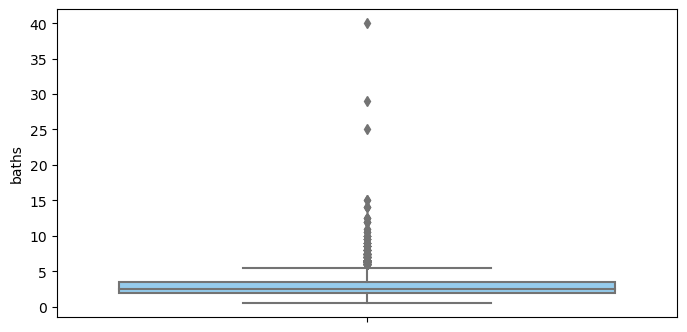

top outliers: price


900      60000000
13381    60000000
20140    52600000
14471    34995000
14431    22500000
Name: price, dtype: int64

Starting distributions for price before outliers removed:


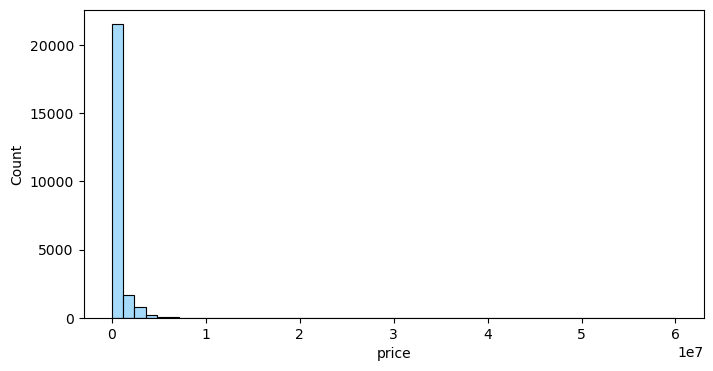

top outliers: square_feet


13707    861617.0
11962     62400.0
7867      50000.0
5025      23740.0
2833      22332.0
Name: square_feet, dtype: float64

Starting distributions for square_feet before outliers removed:


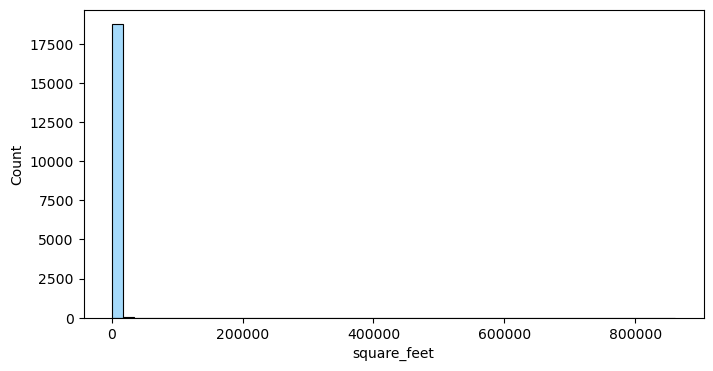

top outliers: year_built


19729    2026.0
19740    2026.0
1297     2026.0
1096     2026.0
1637     2026.0
Name: year_built, dtype: float64

Starting distributions for year_built before outliers removed:


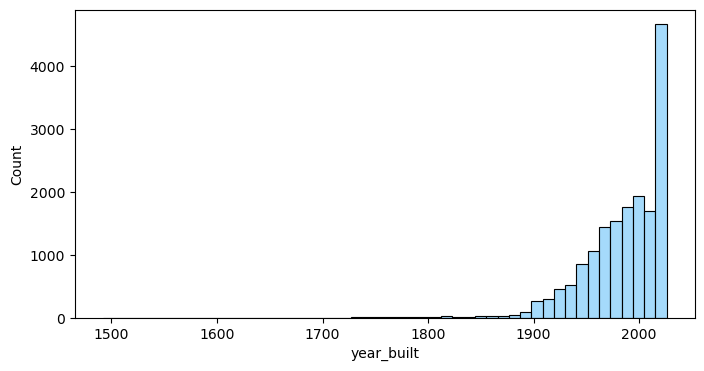

top outliers: days_on_market


14955    4134
14952    4128
14951    4079
11462    4036
14949    4004
Name: days_on_market, dtype: int64

Starting distributions for days_on_market before outliers removed:


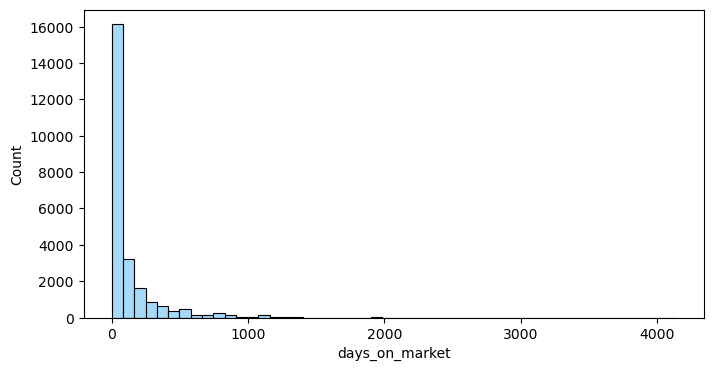

top outliers: hoa_per_month


23612    40758
23505     2762
23528     2762
23479     2762
1798      2703
Name: hoa_per_month, dtype: int64

Starting distributions for hoa_per_month before outliers removed:


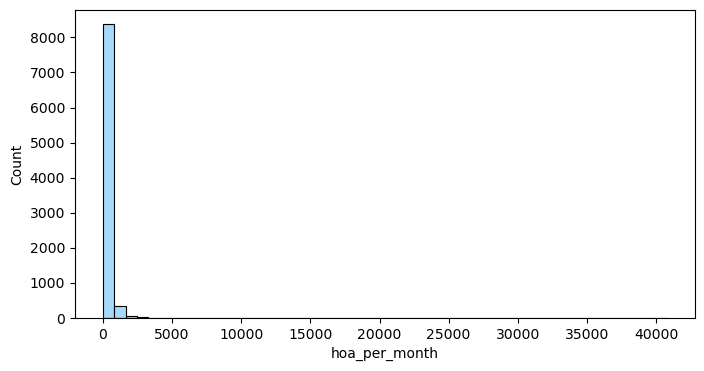

In [1850]:
# displaying top outliers per numeric column all at once while also including distribution chart to see how spread each numeric field is
for col in cols:
    print(f"top outliers: {col}")
    display(df[col].sort_values(ascending = False).head(5))
    print(f"Starting distributions for {col} before outliers removed:")
    plt.figure(figsize=(8,4))
    if col in ["beds","baths"]:
        sns.boxplot(y=col, data = df,color="lightskyblue")
        
    elif col in ["hoa_per_month"]:
        sns.histplot(df[df['hoa_per_month'] > 0]['hoa_per_month'],bins = 50,color="lightskyblue")
        
    else:
        sns.histplot(x=col, data = df,bins = 50,color="lightskyblue")
    plt.show()
        
    

### **Outlier removal**

The charts were helpful but I wanted to take one step further, by showing the quantile ranges at key endpoints, im able to see where most of the data lies for each column - helping me make better informaed decisions when removing outliers


In [1851]:
# all numeric columns have substantial outliers I need to loop through each one removing obvious outleirs then redisplay updated distribution charts
for col in cols:
    quantile1 = df[col].quantile(0.99)
    print(f"99 percentile for {col} ends at: {quantile1}")
    quantile2 = df[col].quantile(0.995)
    print(f"99.5 percentile for {col} ends at: {quantile2}")
    quantile3 = df[col].quantile(0.999)
    print(f"99.9 percentile for {col} ends at: {quantile3}")
    
    
    print("-------------------------------------------")
    
    

99 percentile for beds ends at: 7.0
99.5 percentile for beds ends at: 8.0
99.9 percentile for beds ends at: 10.21600000000035
-------------------------------------------
99 percentile for baths ends at: 7.0
99.5 percentile for baths ends at: 8.0
99.9 percentile for baths ends at: 10.5
-------------------------------------------
99 percentile for price ends at: 3850000.0
99.5 percentile for price ends at: 4972799.999999952
99.9 percentile for price ends at: 10875200.000000404
-------------------------------------------
99 percentile for square_feet ends at: 8431.239999999994
99.5 percentile for square_feet ends at: 9999.04
99.9 percentile for square_feet ends at: 15637.016000000182
-------------------------------------------
99 percentile for year_built ends at: 2025.0
99.5 percentile for year_built ends at: 2025.0
99.9 percentile for year_built ends at: 2026.0
-------------------------------------------
99 percentile for days_on_market ends at: 960.0800000000017
99.5 percentile for day

### **Removing Outliers to Normalize Distributions**

I defined thresholds based on percentiles or distribution knowledge and filtered extreme outliers that distort the distributions of key numeric features.


In [1852]:
# remove all houses that are older than three years and where property type isnt land (land tends to be on market longer) - this will help days on market distribution
df = df[~((df["days_on_market"] >= 1100) & (df["property_type"] != "Land"))]

In [1853]:
# looking back at hoa per months outliers, it only has one huge value. so we can just remove that and be on our way
df = df.drop([23612, 13707, 11962,7867])

In [1854]:
# for year built, we want a reasonable range that isnt too old, when looking to purchase a house you typically dont want something made before 1940 because houses start to have a lot of issues - making sure not to remove nulls
df = df[(df["year_built"] >= 1940) | (df["year_built"].isna())]


In [1855]:
# removing houses with prices outslide of the 2 million $ to remove extreme outliers pulling the rest of the data up - keeping nulls - this is done so we are keeping only reasonably priced homes in our analysis
df = df[(df["price"] <= 3_000_000) | (df["price"].isna())]


In [1856]:
# handling beds and baths - while keeping nulls - most beds and baths for residential properties dont exceed these values, unless in extreme circumstances
df = df[(df['beds'] <= 10) | (df['beds'].isna())]
df = df[(df['baths'] <= 12) | (df['baths'].isna())]

In [1857]:
# cut-off extreme square footage values on bottom and top end ex (< 100 or > 10000) (excluding land values that are nan values)

df = df[(df["square_feet"] > 100) | (df["property_type"] == "Land")]

df = df[(df["square_feet"] <= 10000) | (df["property_type"] == "Land")]

df.head(7)

,address,city,beds,baths,price,status,square_feet,acres,year_built,days_on_market,property_type,hoa_per_month,url
0,Tbd Lake Lndg,Abingdon,NaN,NaN,299000,Active,NaN,1.58,NaN,46,Land,29,https://www.redfin.com/VA/Unknown/Tbd-Lake-Lnd...
1,000 James St,Bluefield,NaN,NaN,31500,Active,NaN,1.36,NaN,41,Land,0,https://www.redfin.com/VA/Bluefield/James-St-2...
2,Tbd Bridgeview Dr,Abingdon,NaN,NaN,70000,Active,NaN,0.50,NaN,354,Land,0,https://www.redfin.com/VA/Unknown/Tbd-Bridgevi...
3,0 Tyler St,Abbs Valley,NaN,NaN,25000,Active,NaN,NaN,NaN,41,Land,0,https://www.redfin.com/VA/Abbs-Valley/Tyler-St...
4,19510 Wynscape Dr,Abingdon,3.0,2.5,470000,Active,2216.0,0.45,2006.0,7,Single Family,0,https://www.redfin.com/VA/Abingdon/19510-Wynsc...
5,16319 Mary St,Abingdon,4.0,1.5,285000,Active,2025.0,0.53,1972.0,4,Single Family,0,https://www.redfin.com/VA/Abingdon/16319-Mary-...
6,15497 Porterfield Hwy,Abingdon,3.0,2.5,459900,Active,2140.0,1.07,1948.0,4,Single Family,0,https://www.redfin.com/VA/Abingdon/15497-Porte...


In [1858]:
# (land propteries with square footage) - some are actually single family homes and some dont actually have any square footage, will handle those here
df[(df["square_feet"].notna()) & (df["property_type"] == "Land")] # - values are actually land: 9208, 21461, 21462 and actually property: 1083, 15690

# Set square_feet to null for land
df.loc[[9211, 21471, 21470], "square_feet"] = np.nan

# Set property_type to 'Single Family' for actual homes
df.loc[[1083, 15695], "property_type"] = "Single Family"

### **Updated correlation matrix after identifying and removing outliers**

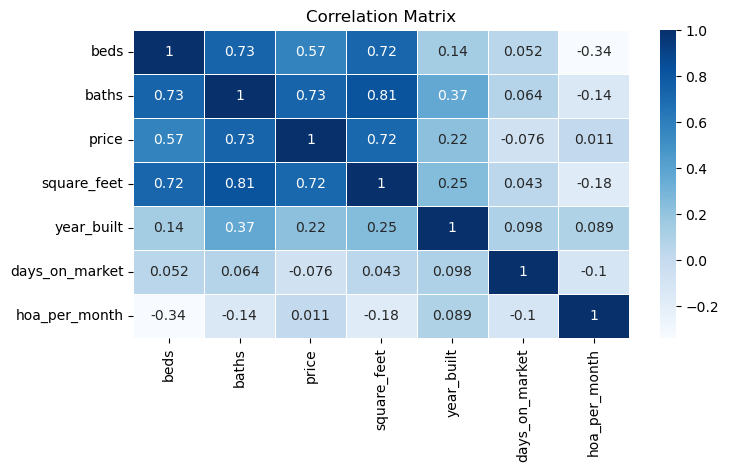

In [1859]:
corr = df[cols].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, linewidths=0.5,cmap="Blues")
plt.title("Correlation Matrix")
plt.show()


### **Re-run of distribution plots to verify that outliers have been accounted for and data is more normalized**

---beds---


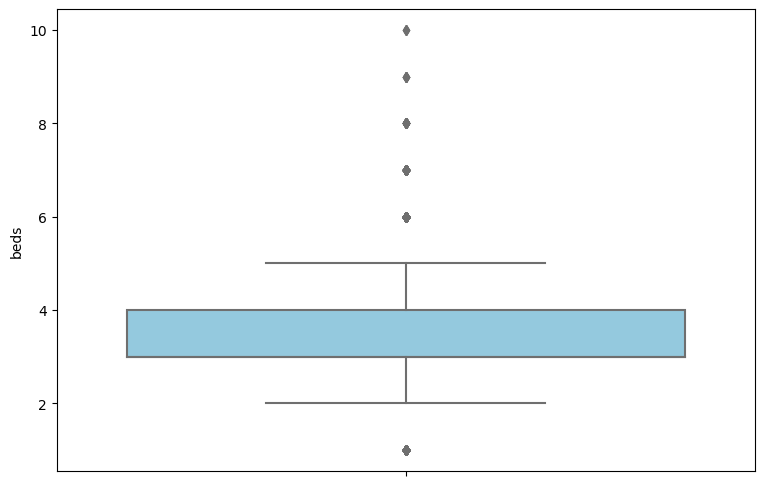

---baths---


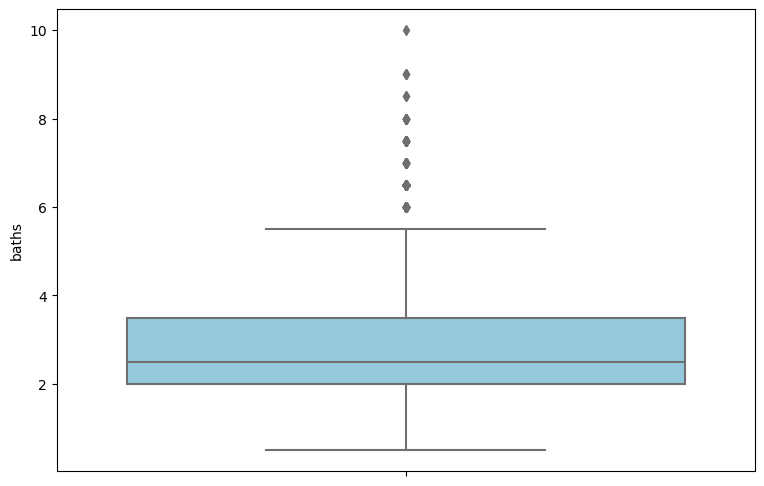

---price---


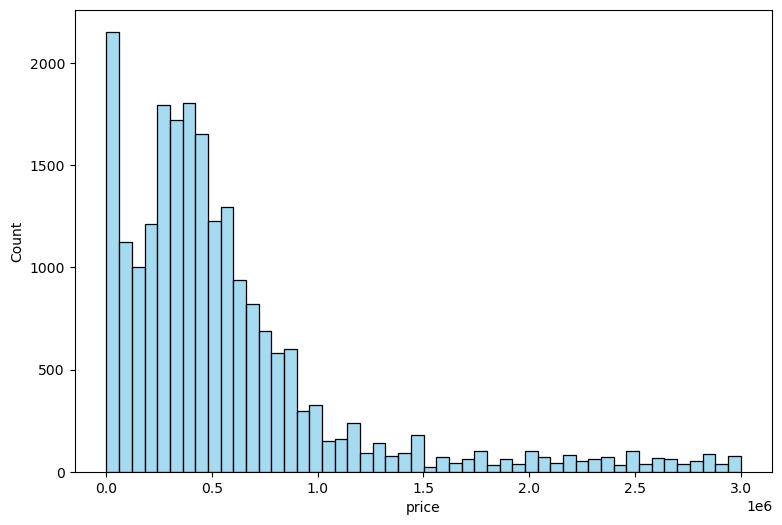

---square_feet---


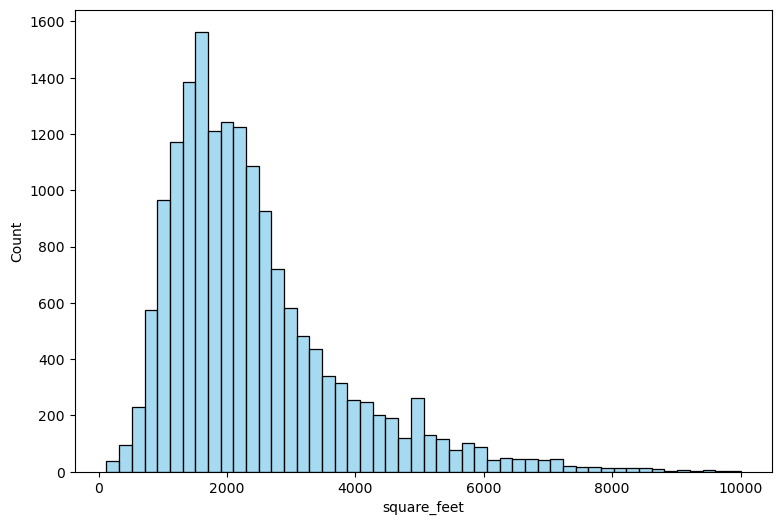

---year_built---


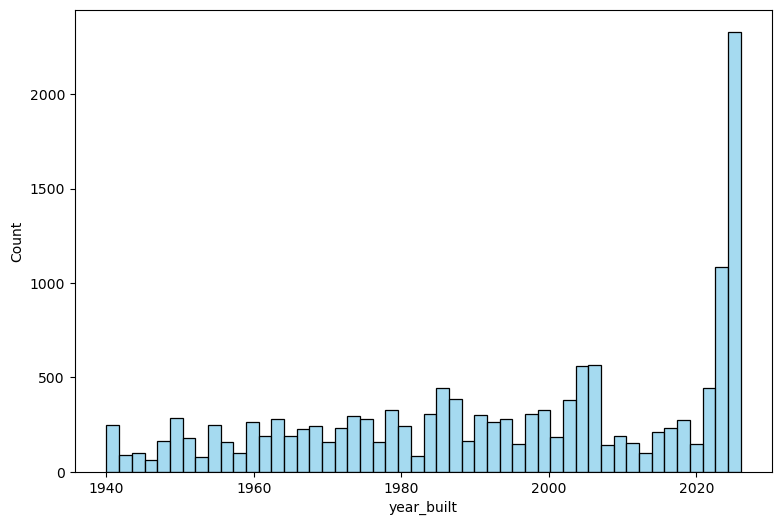

---days_on_market---


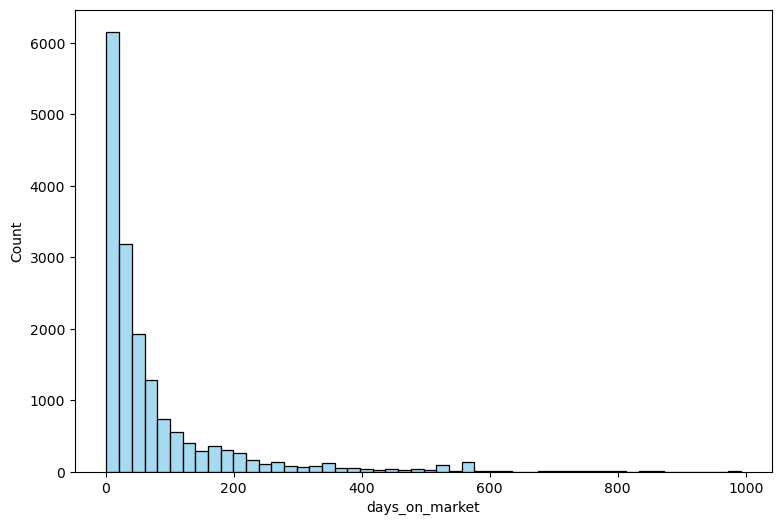

---hoa_per_month---


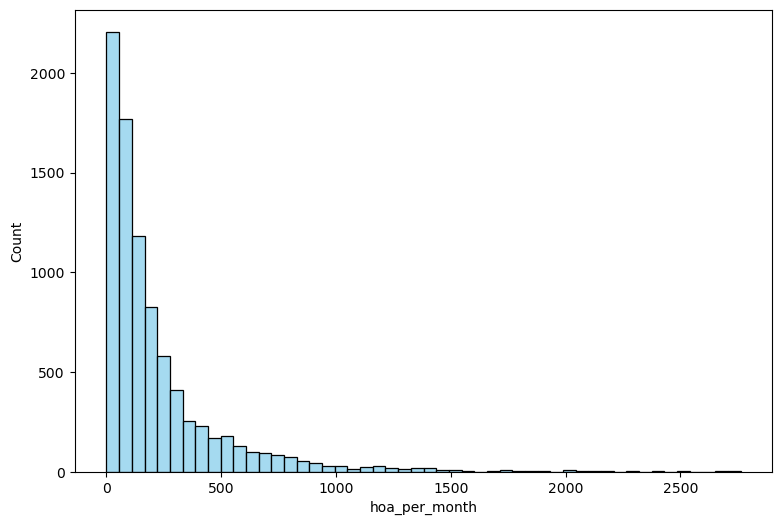

In [1860]:
# re running distributions to see change - days on market still might be skewed because we left the land values in because of lands inherit nature of staying on market longer than usual
for col in cols:
    print(f"---{col}---")
    plt.figure(figsize=(9,6))
    if col in ["beds","baths"]:
        sns.boxplot(y=col, data = df,color="skyblue")
        
    elif col in ["hoa_per_month"]:
        sns.histplot(df[df['hoa_per_month'] > 0]['hoa_per_month'], bins= 50,color = "skyblue")
    
    elif col in ["days_on_market"]:
        sns.histplot(df[df["property_type"] != "Land"]["days_on_market"], bins = 50, color = "skyblue")
        
    else:
        sns.histplot(df[col].dropna(), bins = 50, color = "skyblue")
    
    plt.show()


## **Correlation Analysis**

In [1861]:
# create new price per square foot column
df["price_per_sqft"] = df["price"] / df["square_feet"]
df[["price_per_sqft","price","square_feet"]].sort_values(by="price_per_sqft",ascending=False)

df = df[
    (df["property_type"] == "Land") |
    ((df["price_per_sqft"] <= 800) & (df["property_type"] != "Land"))
]

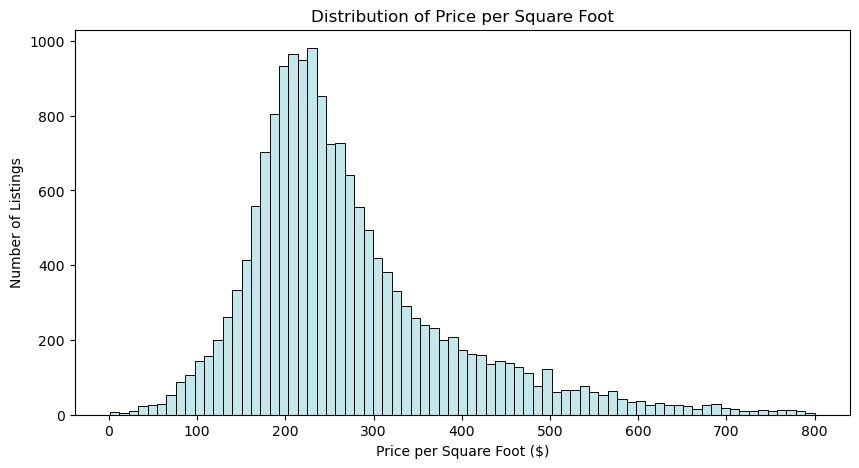

In [1862]:
# filter out non null rows
valid_ppsqft = df["price_per_sqft"].dropna()

# filter to remove extreme outliers 
valid_ppsqft = valid_ppsqft[valid_ppsqft < 1000]

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(valid_ppsqft,bins = 75,color="powderblue")
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot ($)")
plt.ylabel("Number of Listings")
plt.show()


### **Distribution of Price per Square Foot**

 - This histogram shows how listings are distributed based on their price per square foot. 
 - Most properties cluster within the lower-mid price ranges, suggesting typical market pricing for most values in the dataset. 
 - Outliers above $1000/sqft have been removed for better understanding. This plot is useful for identifying what price points are most common.
 - There is opportunity to spot out undervalued or overpriced listings relative to the market norm in future analysis.


Text(0, 0.5, 'Square Feet')

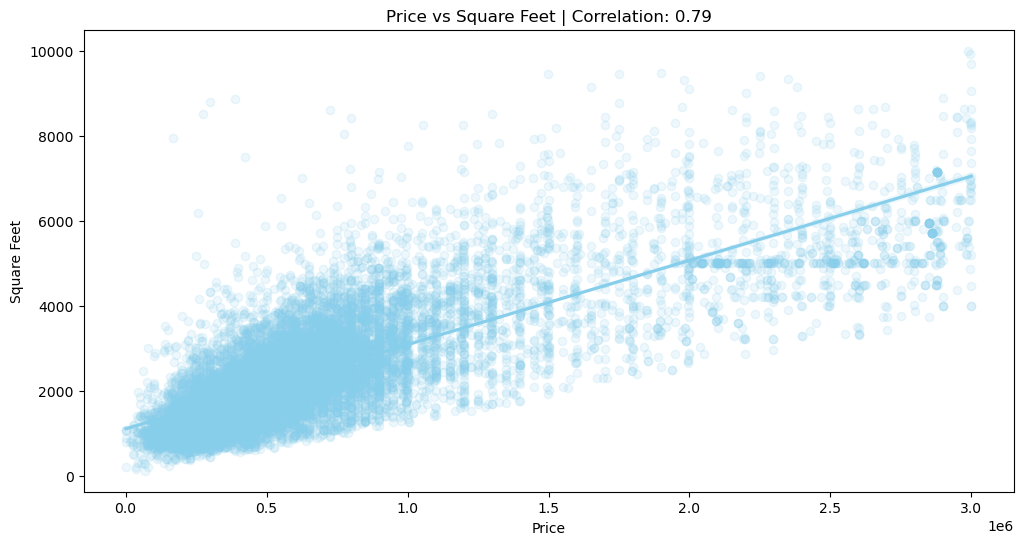

In [1863]:
price_per_sqft_corr = df["price"].corr(df["square_feet"])
plt.figure(figsize=(12,6))
sns.regplot(x="price", y="square_feet", data=df,color="skyblue", scatter_kws={'alpha':0.15})
plt.title(f"Price vs Square Feet | Correlation: {price_per_sqft_corr:.2f}")
plt.xlabel("Price")
plt.ylabel("Square Feet")

### **Price and Square feet has a very positive correlation**
- This indicates that most listings follow expected market trends
- The consistency may make it easier to spot outliers and identify homes that may be undervalued/represent a good deal

Text(0, 0.5, 'Price')

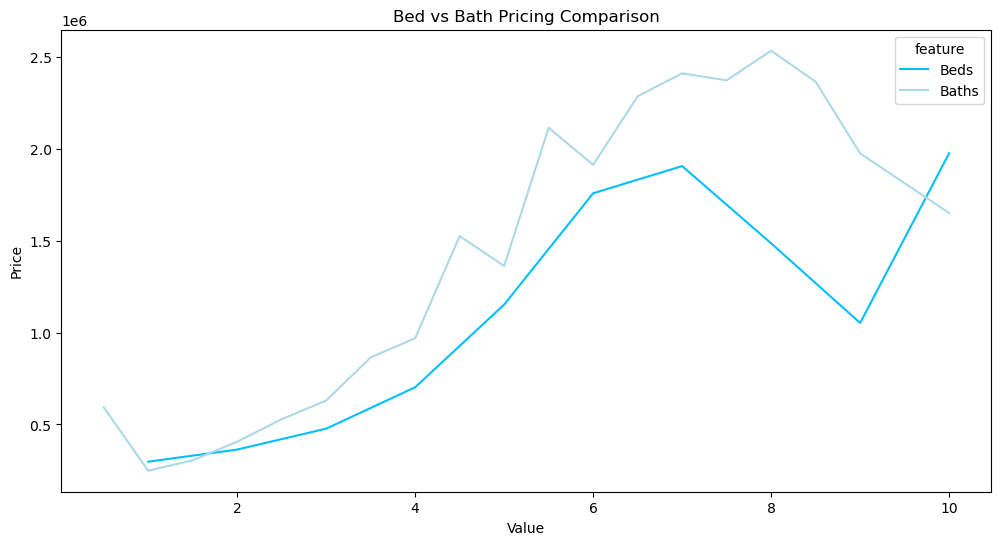

In [1864]:
# price comparison for beds and baths 
avg_price_beds = df.groupby("beds")["price"].mean().reset_index() 
avg_price_baths = df.groupby("baths")["price"].mean().reset_index()

avg_price_beds["feature"] = "Beds"
avg_price_baths["feature"] = "Baths"

avg_price_beds.rename(columns={"beds": "value"}, inplace=True)
avg_price_baths.rename(columns={"baths": "value"}, inplace=True)

comparison_df = pd.concat([avg_price_beds, avg_price_baths])

plt.figure(figsize=(12,6))
sns.lineplot(data=comparison_df,x = "value",y="price",hue = "feature",palette={"Beds":"deepskyblue","Baths":"lightblue"})
plt.title("Bed vs Bath Pricing Comparison")
plt.xlabel("Value")
plt.ylabel("Price")

### **Bed vs. Bath Pricing Comparison**

- This chart shows how average home price increases with the number of bedrooms and bathrooms (expected). 
- Both features are positively correlated with price, but bathrooms show a steeper rise at higher counts. 
- This shows that adding bathrooms may have a more impactful effect on home value than adding bedrooms, especially when entering a higher-end property space.


,property_type,price_per_sqft
2,Large Multi-Family,102.696532
3,Multi-Family,203.449539
5,Single Family,259.186035
6,Townhouse,284.504685
0,Condo,317.832843
4,Ranch,415.306585
1,Land,NaN


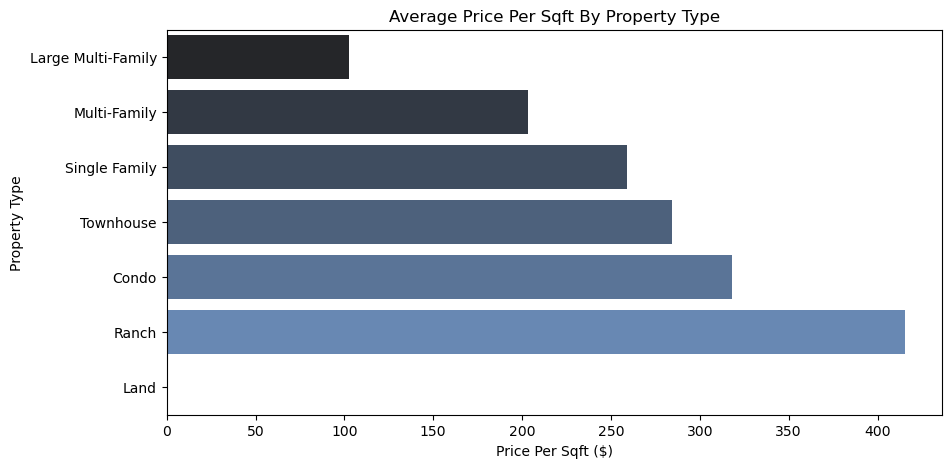

In [1865]:
property_per_sqft = df.groupby("property_type")["price_per_sqft"].mean().reset_index().sort_values(by="price_per_sqft",ascending=True)
plt.figure(figsize=(10,5))
sns.barplot(data = property_per_sqft,x = "price_per_sqft",y = "property_type",palette="dark:#69d")
plt.title("Average Price Per Sqft By Property Type")
plt.xlabel("Price Per Sqft ($)")
plt.ylabel("Property Type")
property_per_sqft

### **Avg Price Per Square Foot Comparison**
- Single family homes have the highest price per square foot out of all of the data, Land listings have the lowest which is expected because of the absense of built property.
- More developed - ready to move in propertys (like single family homes) have a premium cost to square foot compared to townhouses/condos which fall more in that mid-range area
- Excluding land, most property types tend to offer higher prices per square foot due to added value from livable space and privacy.



,property_type,hoa_per_month
0,Condo,480.273415
6,Townhouse,155.960257
5,Single Family,30.629001
1,Land,13.033792
3,Multi-Family,6.265060
2,Large Multi-Family,0.000000
4,Ranch,0.000000


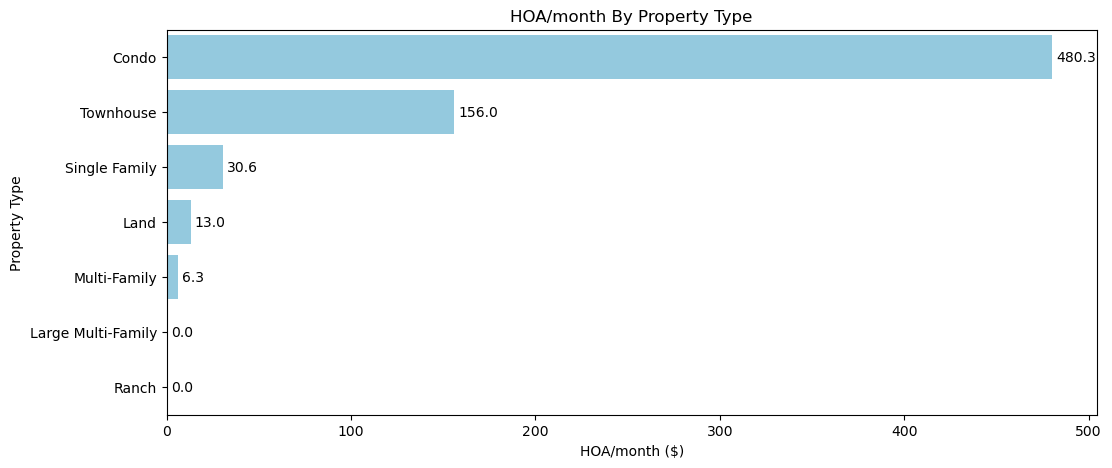

In [1866]:
property_hoa_per_month = df.groupby("property_type")["hoa_per_month"].mean().reset_index().sort_values(by="hoa_per_month",ascending=False)
plt.figure(figsize=(12,5))
ax = sns.barplot(data=property_hoa_per_month, x="hoa_per_month", y="property_type", color="skyblue")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)
plt.title("HOA/month By Property Type")
plt.xlabel("HOA/month ($)")
plt.ylabel("Property Type")
property_hoa_per_month


### **HOA per Month by Property Type**

- This chart shows major discrepancies in HOA costs, with condos and townhouses having significantly higher average monthly fees than other property types.
- This is interesting because in a previous visualization, condos and townhouses had lower average price per square foot, meaning buyers may pay less upfront per unit area.
- However, the higher ongoing HOA fees suggest that these property types may come with more amenities or maintenance costs — which can offset their lower initial cost over time.


Text(0, 0.5, 'Price ($)')

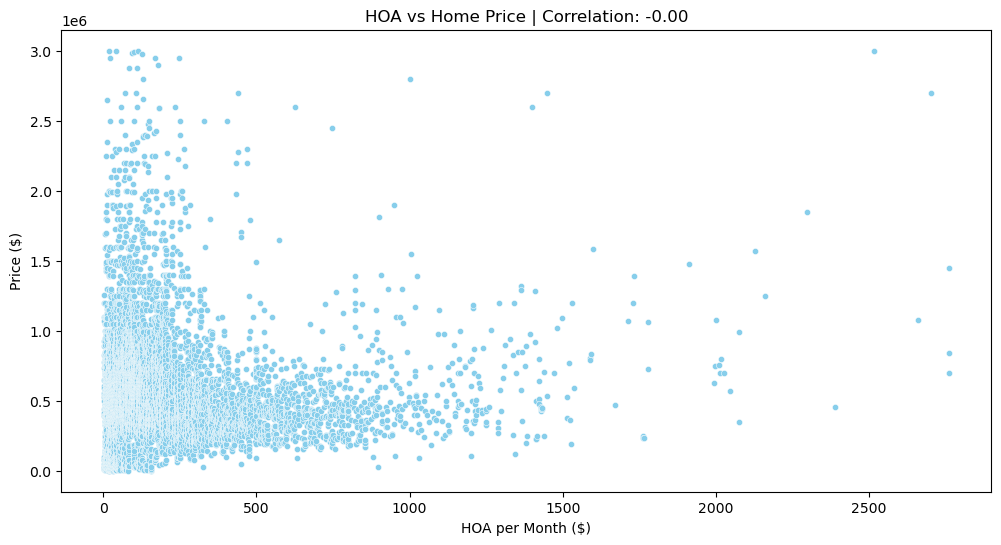

In [1867]:
# hoa vs price
hoa_values_df = df[df["hoa_per_month"] > 0]
hoa_price_corr = hoa_values_df["price"].corr(hoa_values_df["hoa_per_month"])
hoa_prices = hoa_values_df[["price","hoa_per_month"]].sort_values(by="hoa_per_month",ascending=True)
hoa_prices
plt.figure(figsize=(12,6))
sns.scatterplot(data=hoa_prices,x= "hoa_per_month",y= "price",color = "skyblue",s=20)
plt.title(f"HOA vs Home Price | Correlation: {hoa_price_corr:.2f}")
plt.xlabel("HOA per Month ($)")
plt.ylabel("Price ($)")



### **HOA Monthly Fees vs. Price Correlation Scatterplot**

- The plot shows there is **no correlation** between HOA fees and home price.

#### Why This Is Important:

- Higher-priced homes aren’t necessarily tied to large HOA fees, which means buyers can find premium properties without being burdened by monthly dues.
- Buyers interested in HOA properties can focus on the amenities, knowing that the fee isn’t strongly linked to the property's market value.
- For ML modeling, I can avoid overemphasizing HOA fees as a predictor of home price in our machine learning model — it likely adds more value when used alongside other features like property type.


Text(0, 0.5, 'Price Per Square Foot ($)')

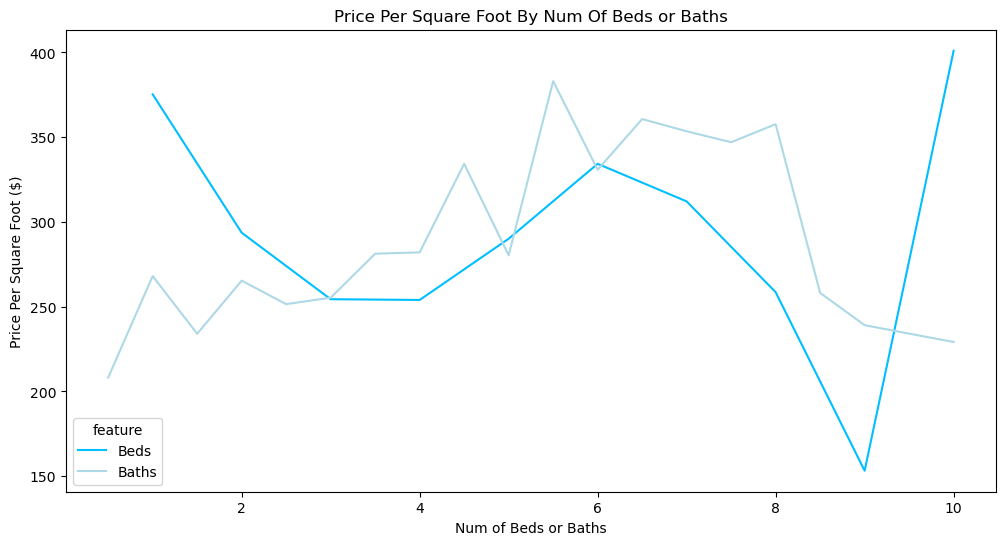

In [1868]:
# price per square foot by num of beds/baths
avg_ppsqft_beds = df.groupby("beds")["price_per_sqft"].mean().reset_index()
avg_ppsqft_baths = df.groupby("baths")["price_per_sqft"].mean().reset_index()

avg_ppsqft_beds["feature"] = "Beds"
avg_ppsqft_baths["feature"] = "Baths"

avg_ppsqft_beds.rename(columns={"beds": "value"}, inplace=True)
avg_ppsqft_baths.rename(columns={"baths": "value"}, inplace=True)

combined = pd.concat([avg_ppsqft_beds, avg_ppsqft_baths])

plt.figure(figsize=(12,6))
sns.lineplot(data=combined, x="value", y="price_per_sqft",hue="feature",palette={"Beds":"deepskyblue","Baths":"lightblue"})
plt.title("Price Per Square Foot By Num Of Beds or Baths")
plt.xlabel("Num of Beds or Baths")
plt.ylabel("Price Per Square Foot ($)")


In [1869]:
# outputting cleaned csv
df.to_csv(r"C:\Users\willm\Desktop\housing_project\ML\housing_modeling_data.csv",index = False)

### **Price Per Square Foot by Number of Beds and Baths**

- Homes with 4 bathrooms show the highest price per square foot, likely influenced by luxury properties.
- Price per sqft increases with bedroom count up to around 5, then begins to level off or decline.
- These trends suggest that adding more beds or baths doesn’t always improve value per square foot.
- This insight helps highlight where space offers the best value and shows that bed/bath count alone isn't a strong predictor of price efficiency — a key consideration when selecting features for modeling or identifying undervalued properties.
- It also suggests a potential strategic split: buyers may get better value at either the lower end or by committing to high-end homes, while mid-range properties (4–5 beds/baths) tend to carry a higher per-square-foot cost.



## **Exploratory Data Analysis Summary**

The primary goal of this EDA phase was to understand the structure and quality of the housing dataset, identify and clean inconsistent values, and uncover meaningful patterns to guide future modeling.

**Key Objectives:**
- Evaluate data completeness after importing from SQL and remove placeholder values like zeros in key numeric fields.
- Visualize distributions using boxplots, histograms, and matrix tables to highlight extreme outliers across numeric variables.
- Examine correlations between features to understand their predictive potential for housing value.

**Approach and Findings:**
- Removed unnecessary columns (`id`) and converted zero values in columns like `beds`, `baths`, and `square_feet` to `NaN`, treating them as missing data.
- Plotted distributions and inspected top outliers for all major numeric features. While many outliers were expected in housing data due to the presence of luxury or high-acreage listings, I focused on identifying and removing only the most extreme values that could distort model training.
- Used a targeted cleaning approach to preserve the foundation of the dataset while ensuring that anomalies like properties with unrealistic values wouldn’t skew modeling results.
- Rechecked correlation matrices and distribution plots after outlier handling to verify that the cleaning process was effective and that no obscene values remained.
- Through distribution analysis and price-per-square-foot comparisons, I observed diminishing returns with additional bedrooms and bathrooms—indicating that more beds/baths don’t always equate to better price efficiency. For instance, homes with 4 bathrooms had the highest price per square foot, often reflecting luxury listings, while values plateaued or declined beyond 5 bedrooms.
- These insights suggest that square footage, property type, and a few key features carry more predictive weight than simply increasing the count of beds or baths.

**Impact on Modeling:**
The insights gained from this analysis will directly support machine learning efforts. Knowing the shape and spread of key variables helps in selecting appropriate algorithms and normalization techniques. Understanding which features such as square footage or number of baths have the strongest correlation with price will inform feature selection. Additionally, by removing extreme distortions in the data, the models trained downstream will be more accurate and generalizable.

